<a href="https://colab.research.google.com/github/addaia/antibreaking/blob/main/plotter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook will be used to plot some of the data from the experiments

In [2]:
!pip install scienceplots

In [3]:
# imports
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import re
import scienceplots # type: ignore
plt.style.use('science')
# parameters for the science style -- too many
plt.style.use(['science','no-latex'])
plt.rcParams.update({
    "font.size": 16,
    "axes.labelsize": 16,
    "legend.fontsize": 16,
    "xtick.labelsize": 16,
    "ytick.labelsize": 16,
    "axes.linewidth": 1,
    "axes.edgecolor": "black",
    "legend.fancybox": True,
    "legend.frameon": True,
    "legend.edgecolor": "black",
    "axes.facecolor": "white",
    "axes.grid": True,
    "grid.color": "#b7b7b7",
    "grid.linestyle": "-",
    "grid.linewidth": 0.5,
})


In [4]:
def parse_data(data_str):
    """
    robot output to lists to plot
    """
    x1 = []
    x2 = []
    for line in data_str.strip().splitlines():
        line = line.strip()
        if not line:
            continue
        parts = line.split()
        if len(parts) >= 2:
            x1.append(float(parts[0]))
            x2.append(float(parts[1]))
        else:
            print("Skipping line:", line)
    return x1, x2

## POS v TIME

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

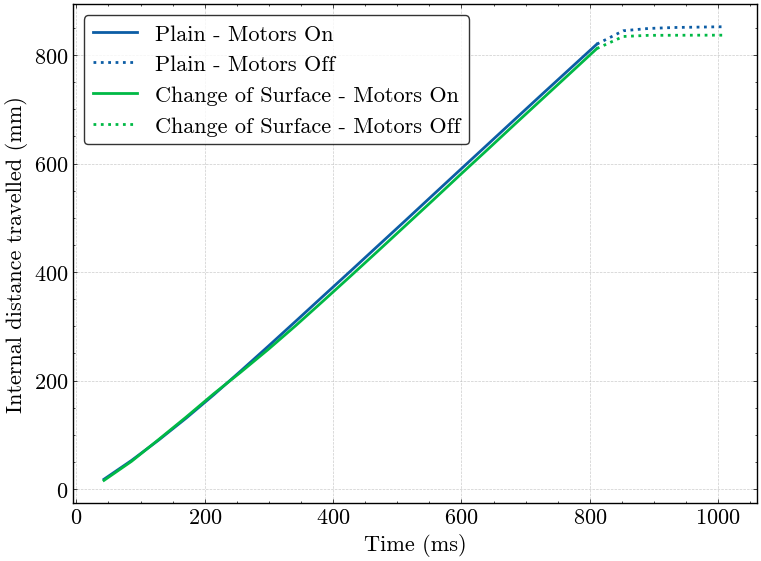

In [ ]:
data_str1 = """
43.00 18.04
86.00 52.78
128.00 90.07
171.00 130.67
214.00 173.68
256.00 217.59
299.00 263.30
342.00 309.61
384.00 355.18
427.00 401.64
470.00 448.55
512.00 494.25
555.00 541.46
598.00 588.50
640.00 634.33
683.00 681.33
726.00 728.17
768.00 773.66
811.00 820.19
852.00 844.81
891.00 849.01
931.00 850.82
972.00 851.57
1012.00 852.32
"""
data_str2 = """
43.00 15.94
86.00 51.13
128.00 91.12
171.00 132.63
214.00 175.63
256.00 215.33
299.00 257.44
342.00 301.49
384.00 346.15
427.00 392.32
470.00 438.93
512.00 484.77
555.00 531.81
598.00 579.29
640.00 625.09
683.00 672.38
726.00 719.22
768.00 765.01
811.00 812.03
852.00 834.26
891.00 836.36
932.00 836.51
972.00 836.66
1012.00 836.66
"""

# parse)
times1, acc1 = parse_data(data_str1)
times2, acc2 = parse_data(data_str2)

# split index
split_index1 = len(times1) - 6
split_index2 = len(times2) - 6

plt.figure(figsize=(8, 6))

# plain
line1, = plt.plot(times1[:split_index1+1], acc1[:split_index1+1], linestyle='-', linewidth=2, label='Plain')
plt.plot(times1[split_index1:], acc1[split_index1:], linestyle=':', linewidth=2, color=line1.get_color())

# CoS
line2, = plt.plot(times2[:split_index2+1], acc2[:split_index2+1], linestyle='-', linewidth=2, label='Change of Surface')
plt.plot(times2[split_index2:], acc2[split_index2:], linestyle=':', linewidth=2, color=line2.get_color())

plt.xlabel("Time (ms)")
plt.ylabel("Internal distance travelled (mm)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# custom legend handles
handle_plain_on  = Line2D([0], [0], color=line1.get_color(), linestyle='-', linewidth=2)
handle_plain_off = Line2D([0], [0], color=line1.get_color(), linestyle=':', linewidth=2)
handle_cos_on    = Line2D([0], [0], color=line2.get_color(), linestyle='-', linewidth=2)
handle_cos_off   = Line2D([0], [0], color=line2.get_color(), linestyle=':', linewidth=2)

# legend
plt.legend(
    [handle_plain_on, handle_plain_off, handle_cos_on, handle_cos_off],
    ['Plain - Motors On', 'Plain - Motors Off',
     'Change of Surface - Motors On', 'Change of Surface - Motors Off']
)

plt.savefig('pos.pdf')
from google.colab import files
files.download('pos.pdf')
plt.show()

## Acceleration vs time

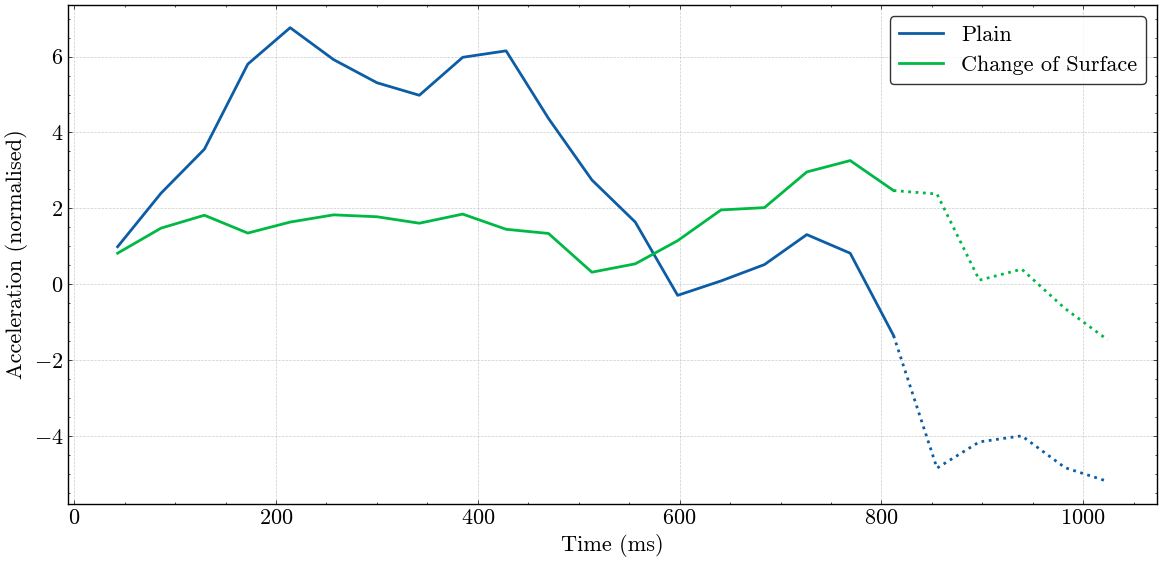

In [ ]:
data_str1 = """
43 0.99
86 2.40
129 3.56
172 5.80
214 6.76
257 5.92
300 5.31
342 4.98
385 5.98
428 6.15
470 4.37
513 2.75
556 1.64
598 -0.29
641 0.09
684 0.52
726 1.31
769 0.82
812 -1.35
855 -4.84
897 -4.15
939 -3.99
982 -4.83
1024 -5.19
"""
data_str2 = """
43 0.82
86 1.48
129 1.82
172 1.35
214 1.64
257 1.83
300 1.78
342 1.61
385 1.85
428 1.45
470 1.34
513 0.32
556 0.54
598 1.15
641 1.96
684 2.02
726 2.96
769 3.26
812 2.47
855 2.38
897 0.11
939 0.40
982 -0.64
1024 -1.46
"""

# parse)
times1, acc1 = parse_data(data_str1)
times2, acc2 = parse_data(data_str2)

# split index
split_index1 = len(times1) - 6
split_index2 = len(times2) - 6

plt.figure(figsize=(12, 6))

# plain
line1, = plt.plot(times1[:split_index1+1], acc1[:split_index1+1], linestyle='-', linewidth=2, label='Plain')
plt.plot(times1[split_index1:], acc1[split_index1:], linestyle=':', linewidth=2, color=line1.get_color())

# CoS
line2, = plt.plot(times2[:split_index2+1], acc2[:split_index2+1], linestyle='-', linewidth=2, label='Change of Surface')
plt.plot(times2[split_index2:], acc2[split_index2:], linestyle=':', linewidth=2, color=line2.get_color())

plt.xlabel("Time (ms)")
plt.ylabel("Acceleration (normalised)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()




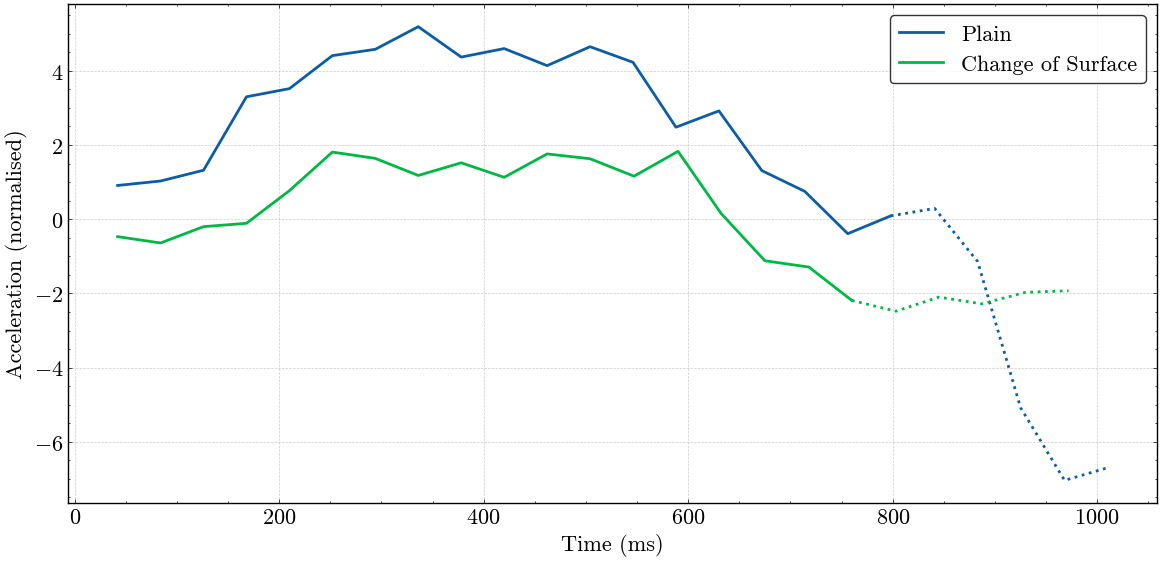

In [ ]:
data_str1 = """
42 0.91
84 1.03
126 1.32
168 3.30
210 3.52
252 4.41
294 4.58
336 5.19
378 4.37
420 4.60
462 4.14
504 4.65
546 4.23
588 2.48
630 2.92
672 1.31
714 0.75
756 -0.39
798 0.09
841 0.29
883 -1.14
925 -5.08
968 -7.04
1010 -6.70

"""
data_str2 = """
42 -0.47
84 -0.64
126 -0.20
168 -0.11
210 0.77
252 1.81
294 1.64
336 1.18
378 1.52
420 1.13
462 1.76
504 1.63
547 1.16
590 1.83
632 0.16
675 -1.12
718 -1.29
760 -2.19
803 -2.48
845 -2.10
887 -2.28
930 -1.97
972 -1.93


"""

# parse)
times1, acc1 = parse_data(data_str1)
times2, acc2 = parse_data(data_str2)

# split index
split_index1 = len(times1) - 6
split_index2 = len(times2) - 6

plt.figure(figsize=(12, 6))

# plain
line1, = plt.plot(times1[:split_index1+1], acc1[:split_index1+1], linestyle='-', linewidth=2, label='Plain')
plt.plot(times1[split_index1:], acc1[split_index1:], linestyle=':', linewidth=2, color=line1.get_color())

# CoS
line2, = plt.plot(times2[:split_index2+1], acc2[:split_index2+1], linestyle='-', linewidth=2, label='Change of Surface')
plt.plot(times2[split_index2:], acc2[split_index2:], linestyle=':', linewidth=2, color=line2.get_color())

plt.xlabel("Time (ms)")
plt.ylabel("Acceleration (normalised)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

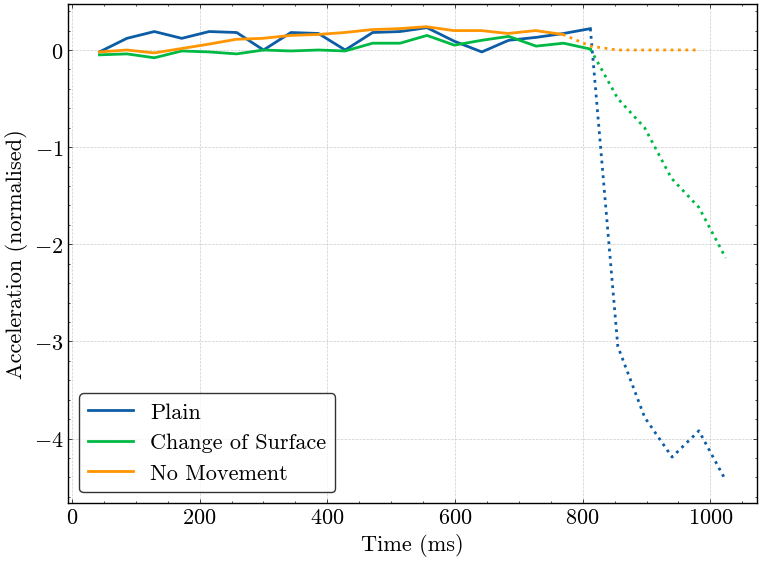

In [ ]:
data_str1 = """
43 -0.02
86 0.12
129 0.19
172 0.12
215 0.19
258 0.18
300 0.00
343 0.18
386 0.17
428 0.00
471 0.18
514 0.19
556 0.23
599 0.09
642 -0.02
684 0.10
727 0.13
770 0.17
812 0.22
855 -3.05
897 -3.78
940 -4.19
982 -3.92
1024 -4.43



"""

data_str2 = """
43 -0.05
86 -0.04
129 -0.08
172 -0.01
215 -0.02
258 -0.04
300 0.00
343 -0.01
386 -0.00
428 -0.01
471 0.07
514 0.07
556 0.15
599 0.05
642 0.10
684 0.14
727 0.04
770 0.07
812 0.01
855 -0.50
897 -0.80
939 -1.32
982 -1.62
1024 -2.14



"""


data_str3 = """
43 -0.02
86 0.00
129 -0.03
214 0.06
257 0.11
299 0.12
342 0.15
385 0.16
427 0.18
470 0.21
513 0.22
555 0.24
598 0.20
641 0.20
683 0.17
726 0.20
769 0.16
812 0.04
854 0.00
896 0.00
938 0.00
981 0.00



"""

# parse)
times1, acc1 = parse_data(data_str1)
times2, acc2 = parse_data(data_str2)
times3, acc3 = parse_data(data_str3)

# split index
split_index1 = len(times1) - 6
split_index2 = len(times2) - 6
split_index3 = len(times3) - 6

plt.figure(figsize=(8, 6))

# plain
line1, = plt.plot(times1[:split_index1+1], acc1[:split_index1+1], linestyle='-', linewidth=2, label='Plain')
plt.plot(times1[split_index1:], acc1[split_index1:], linestyle=':', linewidth=2, color=line1.get_color())

# CoS
line2, = plt.plot(times2[:split_index2+1], acc2[:split_index2+1], linestyle='-', linewidth=2, label='Change of Surface')
plt.plot(times2[split_index2:], acc2[split_index2:], linestyle=':', linewidth=2, color=line2.get_color())

line3, = plt.plot(times3[:split_index3+1], acc3[:split_index3+1], linestyle='-', linewidth=2, label='No Movement')
plt.plot(times3[split_index3:], acc3[split_index3:], linestyle=':', linewidth=2, color=line3.get_color())

plt.xlabel("Time (ms)")
plt.ylabel("Acceleration (normalised)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

plt.savefig('acc.pdf')
from google.colab import files
files.download('acc.pdf')
plt.show()

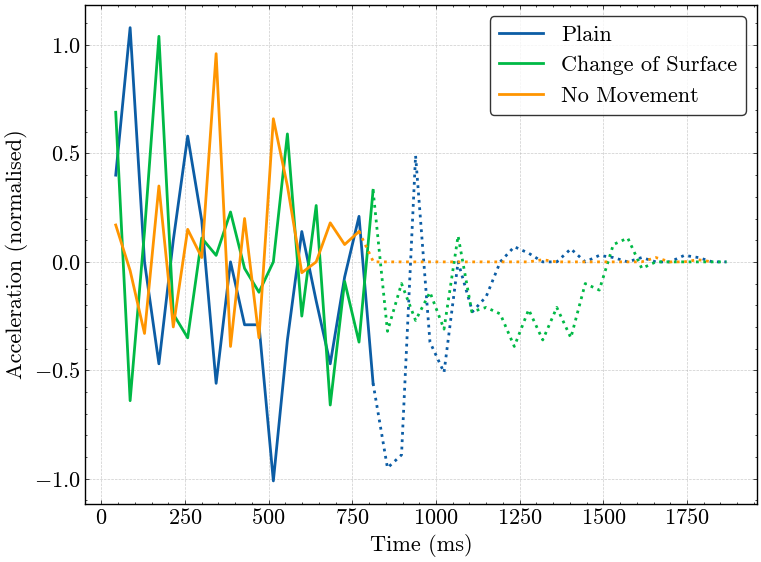

In [ ]:
data_str1 = """
43 0.40
86 1.08
129 0.00
172 -0.47
215 0.10
258 0.58
300 0.19
343 -0.56
386 0.00
428 -0.29
471 -0.29
514 -1.01
556 -0.36
599 0.14
642 -0.18
684 -0.47
727 -0.07
770 0.21
812 -0.56
855 -0.95
897 -0.89
939 0.49
982 -0.37
1024 -0.51
1066 0.00
1109 -0.23
1150 -0.16
1192 0.00
1234 0.07
1277 0.04
1319 0.00
1361 0.00
1403 0.06
1446 0.00
1488 0.03
1530 0.02
1573 0.00
1615 0.02
1657 0.00
1699 0.00
1742 0.03
1784 0.02
1826 0.00
1868 0.00





"""

data_str2 = """
43 0.69
86 -0.64
129 0.14
172 1.04
215 -0.24
258 -0.35
300 0.11
343 0.03
386 0.23
428 -0.03
471 -0.14
514 0.00
556 0.59
599 -0.25
642 0.26
684 -0.66
727 -0.09
770 -0.37
812 0.33
855 -0.32
897 -0.10
939 -0.27
982 -0.14
1024 -0.31
1066 0.12
1107 -0.23
1150 -0.21
1192 -0.24
1234 -0.39
1277 -0.22
1319 -0.36
1361 -0.21
1403 -0.35
1446 -0.10
1488 -0.13
1530 0.08
1573 0.11
1615 -0.03
1657 0.00
1699 0.00
1742 0.00
1784 0.00
1826 0.00
1868 0.00




"""


data_str3 = """
43 0.17
86 -0.04
129 -0.33
172 0.35
215 -0.30
258 0.15
300 0.02
343 0.96
386 -0.39
428 0.20
471 -0.35
514 0.66
556 0.35
599 -0.05
642 0.00
684 0.18
727 0.08
770 0.14
813 0.00
855 0.00
897 0.00
939 0.00
982 0.00
1024 0.00
1066 0.00
1107 0.00
1150 0.00
1192 0.00
1234 0.00
1276 0.00
1319 0.01
1361 0.00
1403 0.00
1445 0.00
1488 0.00
1530 0.00
1572 0.00
1614 0.00
1657 0.02
1699 0.00
1741 0.00
1783 0.01
1826 0.00





"""

# parse)
times1, acc1 = parse_data(data_str1)
times2, acc2 = parse_data(data_str2)
times3, acc3 = parse_data(data_str3)

# split index
split_index1 = len(times1) - 26
split_index2 = len(times2) - 26
split_index3 = len(times3) - 26

plt.figure(figsize=(8, 6))

# plain
line1, = plt.plot(times1[:split_index1+1], acc1[:split_index1+1], linestyle='-', linewidth=2, label='Plain')
plt.plot(times1[split_index1:], acc1[split_index1:], linestyle=':', linewidth=2, color=line1.get_color())

# CoS
line2, = plt.plot(times2[:split_index2+1], acc2[:split_index2+1], linestyle='-', linewidth=2, label='Change of Surface')
plt.plot(times2[split_index2:], acc2[split_index2:], linestyle=':', linewidth=2, color=line2.get_color())

line3, = plt.plot(times3[:split_index3+1], acc3[:split_index3+1], linestyle='-', linewidth=2, label='No Movement')
plt.plot(times3[split_index3:], acc3[split_index3:], linestyle=':', linewidth=2, color=line3.get_color())

plt.xlabel("Time (ms)")
plt.ylabel("Acceleration (normalised)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

#plt.savefig('acc.pdf')
#from google.colab import files
#files.download('acc.pdf')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

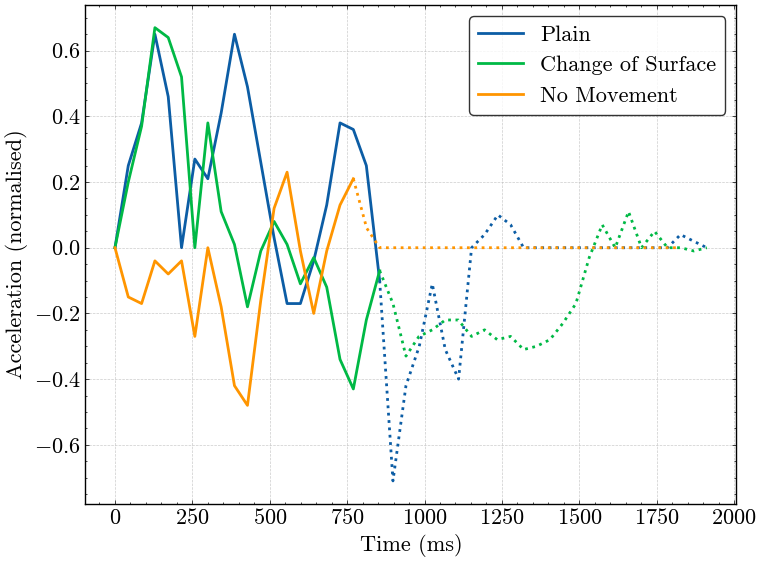

In [ ]:
data_str1 = """
0 0
43 0.25
86 0.38
129 0.65
172 0.46
215 0.00
258 0.27
300 0.21
343 0.41
386 0.65
428 0.49
471 0.26
514 0.03
556 -0.17
599 -0.17
642 -0.04
684 0.13
727 0.38
770 0.36
812 0.25
855 -0.10
898 -0.71
940 -0.42
983 -0.30
1025 -0.11
1067 -0.31
1110 -0.40
1152 0.00
1194 0.04
1237 0.10
1278 0.07
1320 0.00
1362 0.00
1405 0.00
1447 0.00
1489 0.00
1531 0.00
1574 0.00
1616 0.00
1658 0.00
1700 0.00
1743 0.00
1785 0.00
1827 0.04
1869 0.02
1912 0.00


"""

data_str2 = """
0 0
43 0.20
86 0.37
129 0.67
172 0.64
215 0.52
258 0.00
300 0.38
343 0.11
386 0.01
428 -0.18
471 -0.01
514 0.08
556 0.01
599 -0.11
642 -0.03
684 -0.12
727 -0.34
770 -0.43
812 -0.22
855 -0.07
898 -0.17
940 -0.33
982 -0.27
1025 -0.25
1067 -0.22
1109 -0.22
1152 -0.27
1194 -0.25
1235 -0.28
1278 -0.27
1320 -0.31
1362 -0.30
1405 -0.28
1447 -0.23
1489 -0.17
1532 -0.03
1574 0.07
1616 0.00
1659 0.11
1701 0.00
1743 0.05
1785 0.00
1828 0.00
1870 -0.01
1912 0.00





"""


data_str3 = """
0 0
43 -0.15
86 -0.17
129 -0.04
172 -0.08
215 -0.04
258 -0.27
300 0.00
343 -0.18
386 -0.42
428 -0.48
471 -0.16
514 0.12
556 0.23
599 -0.01
642 -0.20
684 -0.01
727 0.13
770 0.21
813 0.06
855 0.00
897 0.00
939 0.00
982 0.00
1024 0.00
1066 0.00
1107 0.00
1150 0.00
1192 0.00
1234 0.00
1276 0.00
1319 0.00
1361 0.00
1403 0.00
1445 0.00
1488 0.00
1530 0.00
1572 0.00
1614 0.00
1657 0.00
1699 0.00
1741 0.00
1783 0.00
1825 0.00






"""

# parse)
times1, acc1 = parse_data(data_str1)
times2, acc2 = parse_data(data_str2)
times3, acc3 = parse_data(data_str3)

# split index
split_index1 = len(times1) - 26
split_index2 = len(times2) - 26
split_index3 = len(times3) - 26

plt.figure(figsize=(8, 6))

# plain
line1, = plt.plot(times1[:split_index1+1], acc1[:split_index1+1], linestyle='-', linewidth=2, label='Plain')
plt.plot(times1[split_index1:], acc1[split_index1:], linestyle=':', linewidth=2, color=line1.get_color())

# CoS
line2, = plt.plot(times2[:split_index2+1], acc2[:split_index2+1], linestyle='-', linewidth=2, label='Change of Surface')
plt.plot(times2[split_index2:], acc2[split_index2:], linestyle=':', linewidth=2, color=line2.get_color())

line3, = plt.plot(times3[:split_index3+1], acc3[:split_index3+1], linestyle='-', linewidth=2, label='No Movement')
plt.plot(times3[split_index3:], acc3[split_index3:], linestyle=':', linewidth=2, color=line3.get_color())

plt.xlabel("Time (ms)")
plt.ylabel("Acceleration (normalised)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

plt.savefig('acc.pdf')
from google.colab import files
files.download('acc.pdf')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

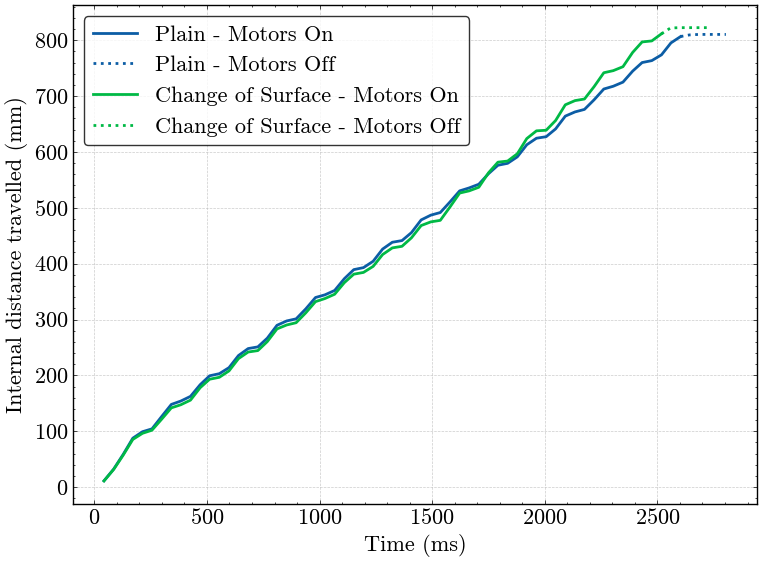

In [12]:
data_str1 = """
43.00 11.13
86.00 32.18
128.00 58.34
171.00 87.52
214.00 99.10
256.00 104.21
299.00 126.31
342.00 147.97
384.00 153.98
427.00 162.40
470.00 183.30
512.00 199.24
555.00 203.00
598.00 213.83
640.00 235.48
683.00 247.96
726.00 250.97
768.00 266.61
811.00 289.61
854.00 297.43
896.00 301.19
939.00 319.09
982.00 339.39
1024.00 344.20
1067.00 352.02
1110.00 373.07
1152.00 389.31
1195.00 392.92
1238.00 404.34
1280.00 426.15
1323.00 438.33
1366.00 441.33
1408.00 455.62
1451.00 478.32
1494.00 486.89
1536.00 491.55
1579.00 510.50
1622.00 530.34
1664.00 535.61
1707.00 542.22
1750.00 561.02
1792.00 576.21
1835.00 579.67
1878.00 591.24
1920.00 612.90
1963.00 624.62
2006.00 627.33
2048.00 641.31
2091.00 664.17
2134.00 671.69
2176.00 676.20
2219.00 693.49
2262.00 712.73
2304.00 717.70
2347.00 725.06
2390.00 744.76
2432.00 760.10
2475.00 763.56
2518.00 773.93
2560.00 795.29
2603.00 806.71
2642.00 809.57
2683.00 810.47
2723.00 810.47
2764.00 810.47
2804.00 810.47


"""
data_str2 = """
43.00 10.98
86.00 31.58
128.00 56.99
171.00 85.26
214.00 96.24
256.00 101.80
299.00 121.50
342.00 141.80
384.00 147.36
427.00 155.63
470.00 177.89
512.00 193.07
555.00 196.53
598.00 207.96
640.00 229.91
683.00 241.79
726.00 244.34
768.00 260.43
811.00 283.14
854.00 290.21
896.00 294.27
939.00 312.01
982.00 332.01
1024.00 337.57
1067.00 345.24
1110.00 365.99
1152.00 381.17
1195.00 384.33
1238.00 395.16
1280.00 416.35
1323.00 428.23
1366.00 431.09
1408.00 446.28
1451.00 468.23
1494.00 474.84
1536.00 477.55
1579.00 501.46
1622.00 526.42
1664.00 530.33
1707.00 536.80
1750.00 562.66
1792.00 581.75
1835.00 583.71
1878.00 596.79
1920.00 624.00
1963.00 637.84
2006.00 638.89
2048.00 656.33
2091.00 684.44
2134.00 691.96
2176.00 694.81
2219.00 717.06
2262.00 741.87
2304.00 745.62
2347.00 752.69
2390.00 778.24
2432.00 797.03
2475.00 798.84
2518.00 811.62
2558.00 821.98
2598.00 822.58
2638.00 822.58
2679.00 822.58
2719.00 822.58



"""

# parse)
times1, acc1 = parse_data(data_str1)
times2, acc2 = parse_data(data_str2)

# split index
split_index1 = len(times1) - 6
split_index2 = len(times2) - 6

plt.figure(figsize=(8, 6))

# plain
line1, = plt.plot(times1[:split_index1+1], acc1[:split_index1+1], linestyle='-', linewidth=2, label='Plain')
plt.plot(times1[split_index1:], acc1[split_index1:], linestyle=':', linewidth=2, color=line1.get_color())

# CoS
line2, = plt.plot(times2[:split_index2+1], acc2[:split_index2+1], linestyle='-', linewidth=2, label='Change of Surface')
plt.plot(times2[split_index2:], acc2[split_index2:], linestyle=':', linewidth=2, color=line2.get_color())

plt.xlabel("Time (ms)")
plt.ylabel("Internal distance travelled (mm)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# custom legend handles
handle_plain_on  = Line2D([0], [0], color=line1.get_color(), linestyle='-', linewidth=2)
handle_plain_off = Line2D([0], [0], color=line1.get_color(), linestyle=':', linewidth=2)
handle_cos_on    = Line2D([0], [0], color=line2.get_color(), linestyle='-', linewidth=2)
handle_cos_off   = Line2D([0], [0], color=line2.get_color(), linestyle=':', linewidth=2)

# legend
plt.legend(
    [handle_plain_on, handle_plain_off, handle_cos_on, handle_cos_off],
    ['Plain - Motors On', 'Plain - Motors Off',
     'Change of Surface - Motors On', 'Change of Surface - Motors Off']
)



plt.savefig('sabs.pdf')
from google.colab import files
files.download('sabs.pdf')
plt.show()

box plot

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

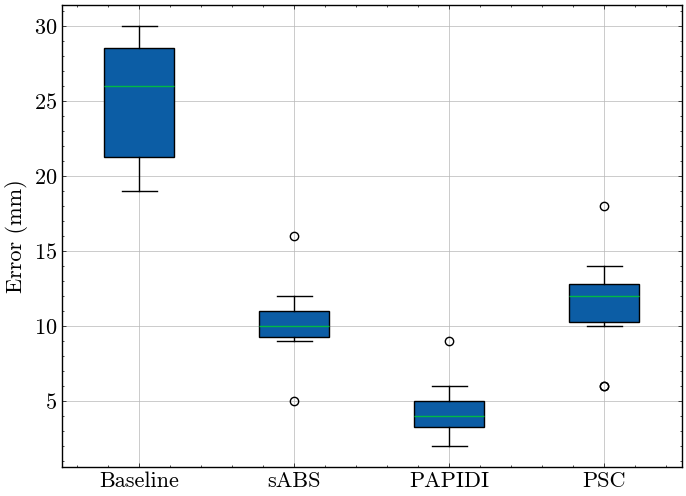

In [ ]:

errors_baseline = [21, 19, 20, 30, 22, 26, 30, 29, 27, 26]
errors_sABS = [5, 10, 9, 12, 11, 10, 10, 11, 9, 16]
errors_PAPIDI = [2, 4, 3, 5, 4, 9, 6, 2, 5, 4]
errors_PSC = [10, 6, 11, 12, 12, 6, 18, 13, 14, 12]
# combine
data = [errors_baseline, errors_sABS, errors_PAPIDI, errors_PSC]

# boxplo
plt.figure(figsize=(8, 6))
plt.boxplot(data, patch_artist=True)


plt.xticks([1, 2, 3, 4], ['Baseline','sABS', 'PAPIDI', 'PSC'])
plt.ylabel('Error (mm)')

plt.savefig('comp.pdf')
from google.colab import files
files.download('comp.pdf')

plt.show()
